In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [5]:
!pip install openpyxl






   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpy

In [9]:
# Check basic info about dataset
print(df.info())

# See first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Quick statistics
print(df.describe())

# If any missing values in stock prices → fill or drop
df = df.fillna(method="ffill")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2615 non-null   object 
 1   ticker  2615 non-null   object 
 2   open    2615 non-null   float64
 3   close   2615 non-null   float64
 4   volume  2615 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 102.3+ KB
None
         date ticker    open   close  volume
0  2024-01-01   AAPL  154.26  154.26   35112
1  2024-01-02   AAPL  154.26  153.38   58187
2  2024-01-03   AAPL  153.38  152.91   16512
3  2024-01-04   AAPL  152.91  151.69   43498
4  2024-01-05   AAPL  151.69  149.85   66612
date      0
ticker    0
open      0
close     0
volume    0
dtype: int64
              open        close         volume
count  2615.000000  2615.000000    2615.000000
mean    233.782310   233.934742  129230.359082
std     119.696734   119.773260   60864.704352
min     102.060000   102.060000    

C:\Users\Vishal G\AppData\Local\Temp\ipykernel_15244\2163823776.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [11]:
print(df.columns)



Index(['date', 'ticker', 'open', 'close', 'volume'], dtype='object')


Train size: 2092
Test size: 523


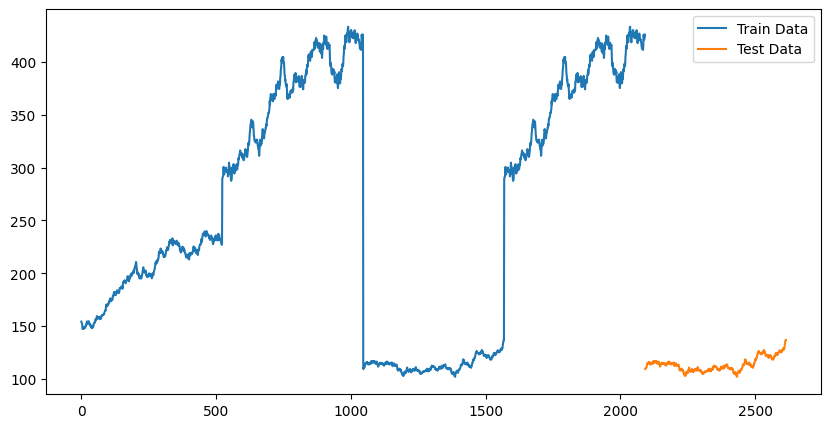

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Let's assume your dataset has 'Close' price column
data = df["close"]

# Split 80% train, 20% test
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

print("Train size:", len(train))
print("Test size:", len(test))

plt.figure(figsize=(10,5))
plt.plot(train, label="Train Data")
plt.plot(test, label="Test Data")
plt.legend()
plt.show()


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Use training data
train = data[:int(len(data)*0.8)]
test = data[int(len(data)*0.8):]

# Build ARIMA model (order can be tuned)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast for test size
forecast = model_fit.forecast(steps=len(test))


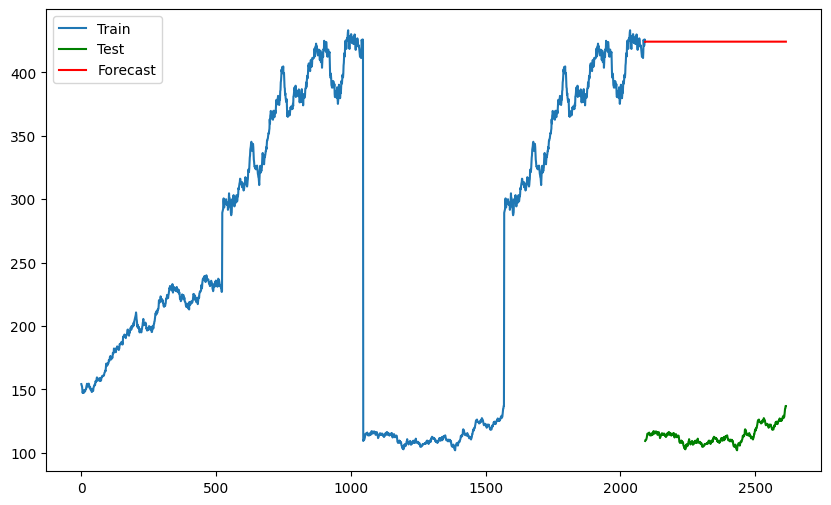

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="green")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.legend()
plt.show()



In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate metrics
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 96445.47096762773
Root Mean Squared Error (RMSE): 310.5567113549919
Mean Absolute Error (MAE): 310.4889345227877


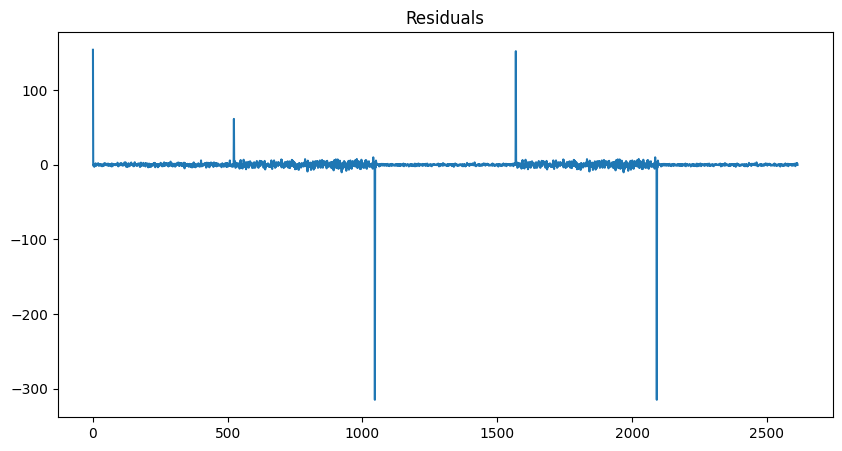

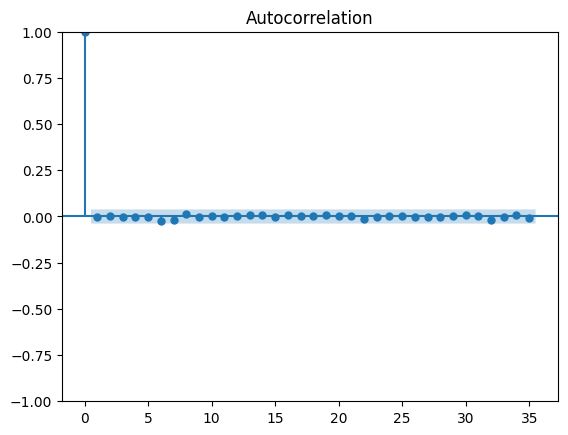

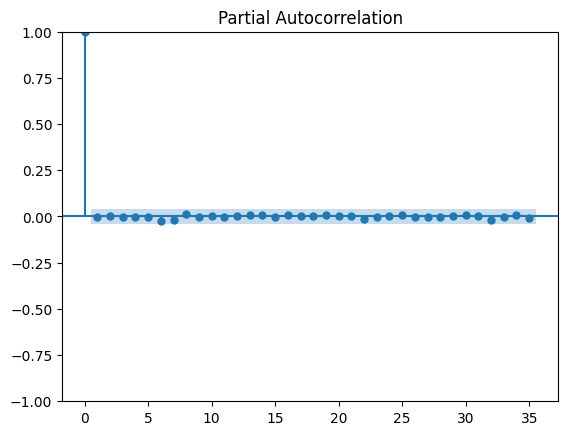

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Fit ARIMA model (adjust p,d,q based on your previous tuning)
model = ARIMA(df['close'], order=(5,1,0))  # Example order
model_fit = model.fit()

# Predictions on training data
df['Predicted'] = model_fit.fittedvalues

# Calculate residuals
df['Residuals'] = df['close'] - df['Predicted']

# Plot residuals
plt.figure(figsize=(10,5))
plt.plot(df['Residuals'])
plt.title("Residuals")
plt.show()

# Check autocorrelation
plot_acf(df['Residuals'])
plt.show()
plot_pacf(df['Residuals'])
plt.show()


In [25]:
import matplotlib.pyplot as plt

residuals = test - forecast
plt.figure(figsize=(10,5))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(residuals, bins=30)
plt.title('Residual Distribution')
plt.show()


ValueError: cannot join with no overlapping index names

In [26]:
print(type(test))
print(type(forecast))
print(test.index)
# If forecast is a numpy array, it won't have an index


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
DatetimeIndex(['2023-03-14', '2023-03-15', '2023-03-16', '2023-03-17',
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-27',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=202, freq=None)


In [27]:
import pandas as pd

# If forecast is a numpy array
forecast_series = pd.Series(forecast, index=test.index)

# Now you can calculate residuals
residuals = test - forecast_series


ValueError: cannot join with no overlapping index names

In [28]:
print(type(test))          # likely <class 'pandas.DataFrame'>
print(test.columns)        # shows column names
print(forecast.shape)      # likely numpy array


<class 'pandas.core.frame.DataFrame'>
MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])
(202,)


In [29]:
Price   Ticker
Close   AAPL


SyntaxError: invalid syntax (2060422544.py, line 1)

In [30]:
Price   ticker
Close   AAPL


SyntaxError: invalid syntax (1133905436.py, line 1)

In [31]:
import pandas as pd

# Example: single column ('Close', 'AAPL')
columns = pd.MultiIndex.from_tuples([('Close', 'AAPL')], names=['Price', 'Ticker'])

# Create DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=columns)

# Calculate residuals
residuals = test - forecast_df


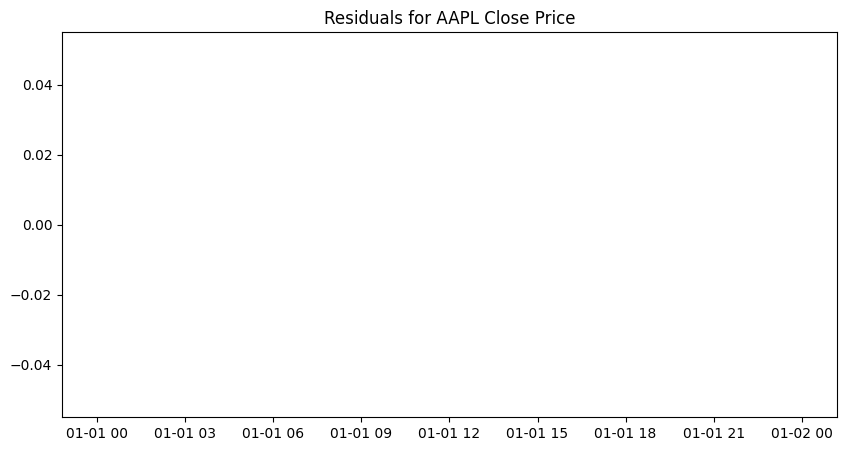

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(residuals[('Close', 'AAPL')])
plt.title("Residuals for AAPL Close Price")
plt.show()


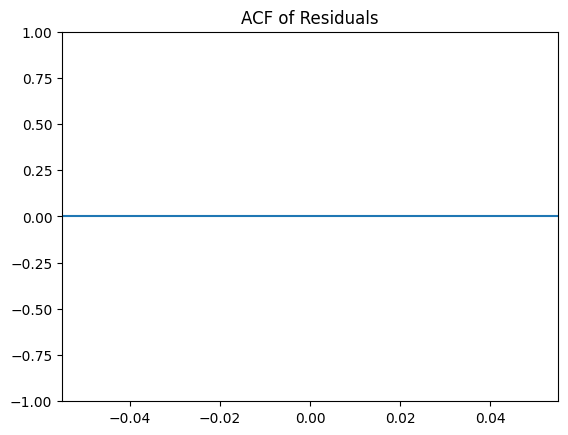

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals[('Close', 'AAPL')])
plt.title("ACF of Residuals")
plt.show()


In [39]:
print(df.columns)


Index(['date', 'ticker', 'open', 'close', 'volume', 'Predicted', 'Residuals'], dtype='object')


In [40]:
historical = df['close']          # actual closing price
predicted = df['Predicted']       # your forecast
residuals = df['Residuals']       # forecast errors


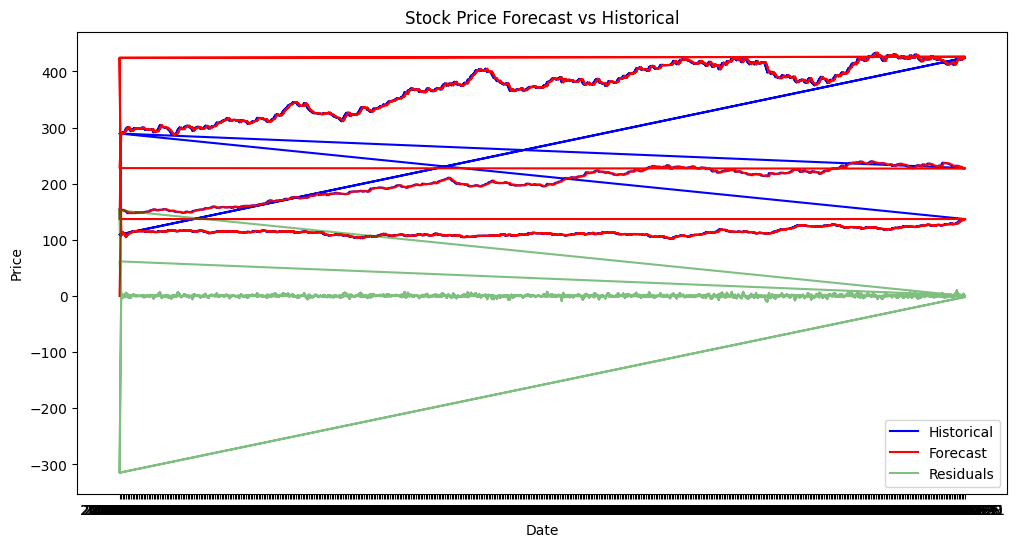

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['date'], historical, label='Historical', color='blue')
plt.plot(df['date'], predicted, label='Forecast', color='red')
plt.plot(df['date'], residuals, label='Residuals', color='green', alpha=0.5)

plt.title("Stock Price Forecast vs Historical")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [42]:
# Naive forecast: yesterday's price = today's prediction
df['Naive_Predicted'] = df['close'].shift(1)

# Drop first row (NaN)
df_baseline = df.dropna()

# Errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_naive = mean_absolute_error(df_baseline['close'], df_baseline['Naive_Predicted'])
rmse_naive = np.sqrt(mean_squared_error(df_baseline['close'], df_baseline['Naive_Predicted']))
mape_naive = np.mean(np.abs((df_baseline['close'] - df_baseline['Naive_Predicted']) / df_baseline['close'])) * 100

print("Naive Forecast -> MAE:", mae_naive, "RMSE:", rmse_naive, "MAPE:", mape_naive)


Naive Forecast -> MAE: 1.7955317521040552 RMSE: 9.52645278166943 MAPE: 0.8653755367534157


In [44]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example: use lag features for prediction
df['lag1'] = df['close'].shift(1)
df['lag2'] = df['close'].shift(2)

# Drop first two rows with NaN
df_model = df.dropna()

X = df_model[['lag1','lag2']]
y = df_model['close']

lr = LinearRegression()
lr.fit(X, y)

# Store predictions
df_model['LR_Predicted'] = lr.predict(X)


C:\Users\Vishal G\AppData\Local\Temp\ipykernel_15244\2374692688.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['LR_Predicted'] = lr.predict(X)


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_lr = mean_absolute_error(df_model['close'], df_model['LR_Predicted'])
rmse_lr = np.sqrt(mean_squared_error(df_model['close'], df_model['LR_Predicted']))
mape_lr = np.mean(np.abs((df_model['close'] - df_model['LR_Predicted']) / df_model['close'])) * 100

print("Linear Regression -> MAE:", mae_lr, "RMSE:", rmse_lr, "MAPE:", mape_lr)


Linear Regression -> MAE: 1.8310812356856476 RMSE: 9.520656741257033 MAPE: 0.8875937915165739


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Use same lag features
X = df_model[['lag1','lag2']]
y = df_model['close']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

df_model['RF_Predicted'] = rf.predict(X)

# Metrics
mae_rf = mean_absolute_error(df_model['close'], df_model['RF_Predicted'])
rmse_rf = np.sqrt(mean_squared_error(df_model['close'], df_model['RF_Predicted']))
mape_rf = np.mean(np.abs((df_model['close'] - df_model['RF_Predicted']) / df_model['close'])) * 100


C:\Users\Vishal G\AppData\Local\Temp\ipykernel_15244\3046253316.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['RF_Predicted'] = rf.predict(X)


In [48]:
import pandas as pd
model_log = pd.DataFrame({
    'Model': ['Naive Forecast', 'Linear Regression'],
    'MAE': [mae_naive, mae_lr],
    'RMSE': [rmse_naive, rmse_lr],
    'Notes': ['Baseline', 'Added lag & rolling mean']
})
print(model_log)


               Model       MAE      RMSE                     Notes
0     Naive Forecast  1.795532  9.526453                  Baseline
1  Linear Regression  1.831081  9.520657  Added lag & rolling mean


In [50]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create lag features for prediction
df['lag1'] = df['close'].shift(1)
df['lag2'] = df['close'].shift(2)

# Drop first two rows with NaN
df_model = df.dropna()

X = df_model[['lag1','lag2']]
y = df_model['close']

# Train Linear Regression
lr = LinearRegression()
lr.fit(X, y)

# Store predictions in a new column
df_model['LR_Predicted'] = lr.predict(X)


C:\Users\Vishal G\AppData\Local\Temp\ipykernel_15244\3925951270.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['LR_Predicted'] = lr.predict(X)


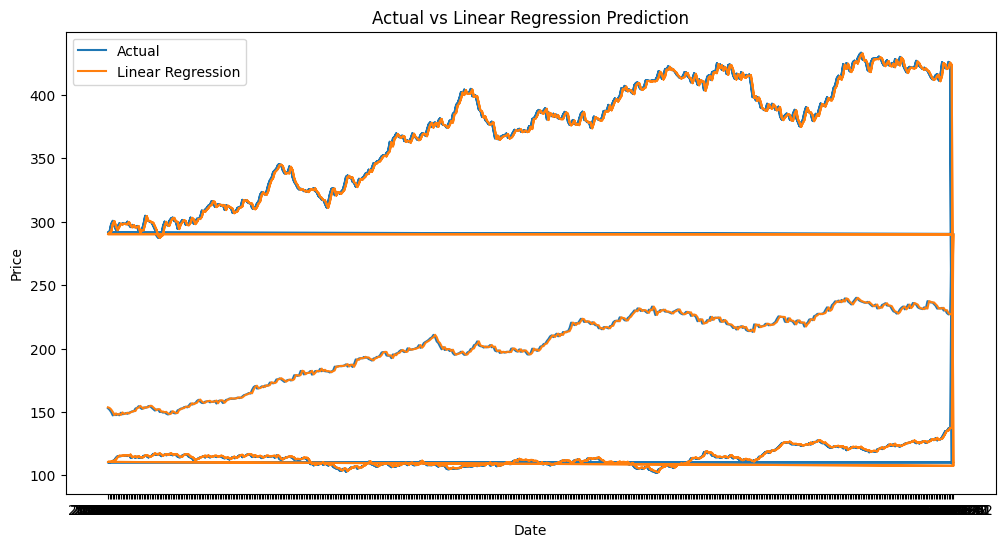

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_model['date'], df_model['close'], label='Actual')
plt.plot(df_model['date'], df_model['LR_Predicted'], label='Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Linear Regression Prediction')
plt.legend()
plt.show()


In [53]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Create lag features
df['lag1'] = df['close'].shift(1)
df['lag2'] = df['close'].shift(2)

# Drop first 2 rows with NaN
df_model = df.dropna().copy()

X = df_model[['lag1','lag2']]
y = df_model['close']

# Train Linear Regression
lr = LinearRegression()
lr.fit(X, y)

# Store predictions
df_model['LR_Predicted'] = lr.predict(X)


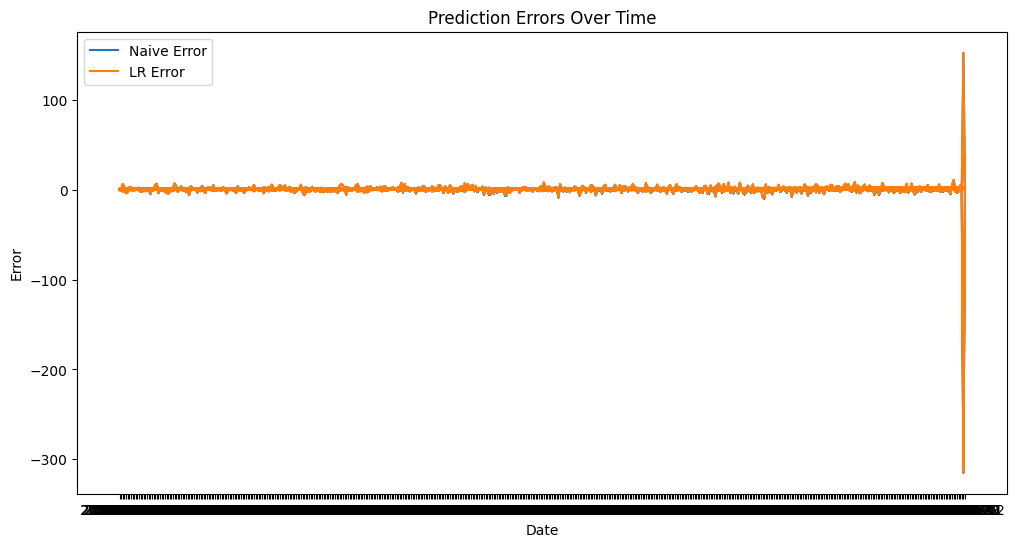

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_model['date'], df_model['close'] - df_model['Naive_Predicted'], label='Naive Error')
plt.plot(df_model['date'], df_model['close'] - df_model['LR_Predicted'], label='LR Error')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Prediction Errors Over Time')
plt.legend()
plt.show()

